In [1]:
%pip install tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
mnist_dataset = tfds.load("mnist", as_supervised=True)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reserving 10,000 images for validation from training to make sure test set is untouched until end
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

## reshaping the input for X but not y (since y is ground truth labels) to add extra dimension for channel = 1(grayscale not RGB)

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)



In [6]:
print("x-train dimensions:", x_train.shape)
print("y-train dimensions:",y_train.shape) # ground truth labels for training

print()

print("x-val dimensions:", x_val.shape)
print("y-val dimensions:",y_val.shape) # ground truth labels for training

print()

print("x-test dimensions:", x_test.shape) # ground truth labels for testing
print("y-test dimensions:",y_test.shape)

x-train dimensions: (50000, 28, 28, 1)
y-train dimensions: (50000,)

x-val dimensions: (10000, 28, 28, 1)
y-val dimensions: (10000,)

x-test dimensions: (10000, 28, 28, 1)
y-test dimensions: (10000,)


In [7]:
type(x_train)

numpy.ndarray

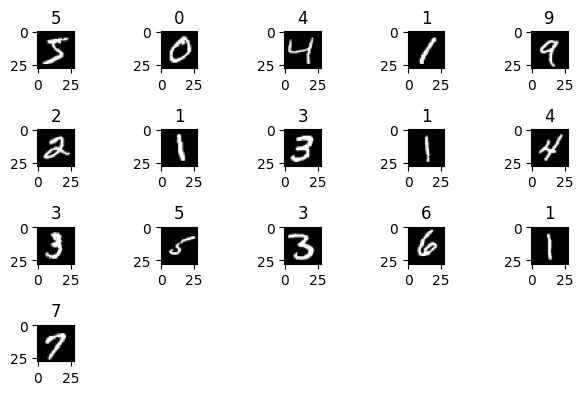

In [8]:
for i in range(16):
    img = x_train[i]
    label = y_train[i]

    plt.subplot(5, 5, i+1)
    plt.title(str(f"{label}")) # ground truth labels
    plt.tight_layout()
    plt.imshow(img, cmap="gray") # using grayscale to simplify network architecture

plt.show()

## setting hyperparameters

In [9]:
BATCH_SIZE = 64
LEARNING_RATE = 0.01

## data preparation (preprocessing + transformations) for train + validation

In [10]:
train_data_generation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True
)

validation_data_generation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True
)

train_generator = train_data_generation.flow(
    x_train, # image data array
    y_train, # label - ground truth array
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_generator = validation_data_generation.flow(
    x_val, # image data array for validation
    y_val, # label - ground truth array for validation
    batch_size=BATCH_SIZE,
    shuffle=True
)